In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind, normaltest

In [2]:
# Read in our data set
df = pd.read_csv("Scripts/Dataset.csv")

In [3]:
# Separate the sentiment into its own columns
df[['neg','neu', 'pos', 'compound']] = df.Sentiment.str.split(",",expand=True)

# Drop sentinment, we dont need it anymore
df = df.drop(['Sentiment'], axis=1);

In [4]:
# Clean up the extraneous parts of the strings
def just_digits(label):
    numbers = re.compile('\d+(?:\.\d+)?')
    return numbers.findall(label)[0]

df['neg'] = df['neg'].apply(just_digits).astype(float);
df['neu'] = df['neu'].apply(just_digits).astype(float);
df['pos'] = df['pos'].apply(just_digits).astype(float);
df['compound'] = df['compound'].apply(just_digits).astype(float);


In [5]:
# drop rows where all values are 0
df = df[(df[['neg', 'neu', 'pos', 'compound']] != 0).any(axis=1)]

In [6]:
# Breitbart has too few data points
# randomly picks the number of data points in Breitbart from CNN and NYT
# creates new df
cnn_rows = df[df.News_Source == "CNN"].sample(n = 2174)
nyt_rows = df[df.News_Source == "NYT"].sample(n = 2174)
breitbart_rows = df[df.News_Source == "Breitbart"]
df = pd.concat([cnn_rows, nyt_rows, breitbart_rows])

In [7]:
df

,News_Source,Candidate,neg,neu,pos,compound
92185,CNN,Trump,0.084,0.747,0.169,0.3804
23507,CNN,Trump,0.164,0.776,0.060,0.9942
103534,CNN,Trump,0.029,0.924,0.047,0.6177
83347,CNN,Trump,0.037,0.859,0.104,0.3400
65252,CNN,Trump,0.064,0.936,0.000,0.2960
...,...,...,...,...,...,...
110855,Breitbart,Hillary,0.065,0.873,0.062,0.0240
110856,Breitbart,Hillary,0.000,0.946,0.054,0.0387
110857,Breitbart,Hillary,0.000,0.946,0.054,0.0387
110858,Breitbart,Hillary,0.042,0.725,0.233,0.7430


# Data Visualization
Now that we have our data, let us just visualize it.  This will be split up into two sections, Trump and Clinton.  And each section will have a histogram of negative, positive, and neutral sentiment data for each news source for that candidate

## Trump Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

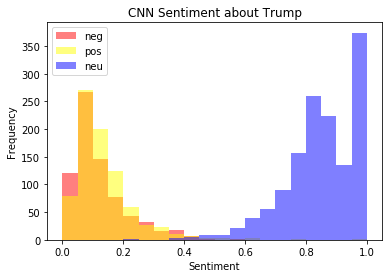

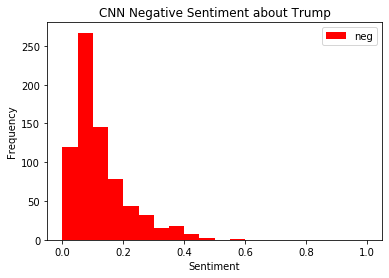

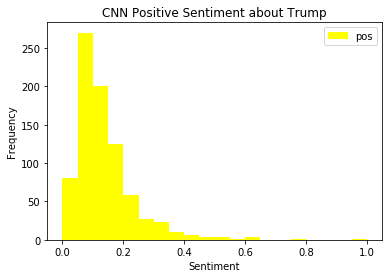

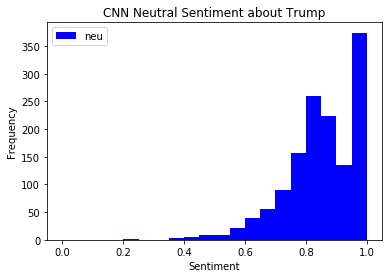

In [8]:
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=['red','yellow','blue'], title='CNN Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"], title='CNN Negative Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"], title='CNN Positive Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"], title='CNN Neutral Sentiment about Trump').set_xlabel("Sentiment")


### Breitbart Articles

Text(0.5, 0, 'Sentiment')

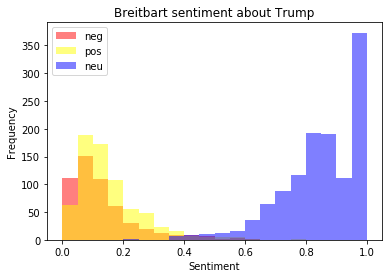

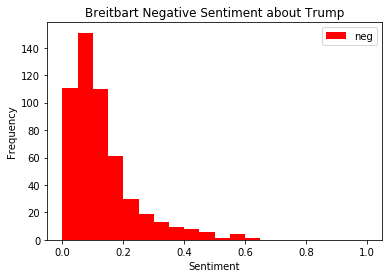

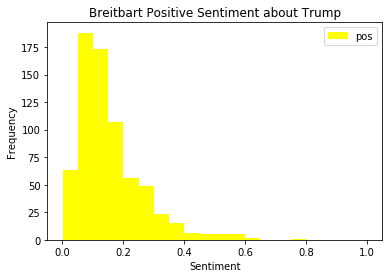

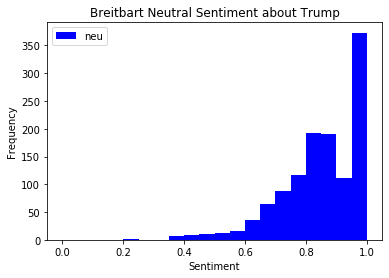

In [9]:
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=['red','yellow','blue'], title='Breitbart sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart Negative Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"],title='Breitbart Positive Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Neutral Sentiment about Trump').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

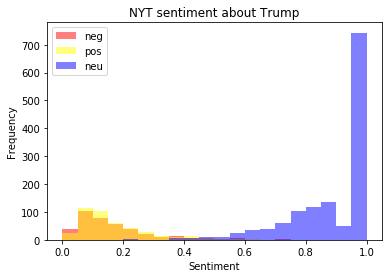

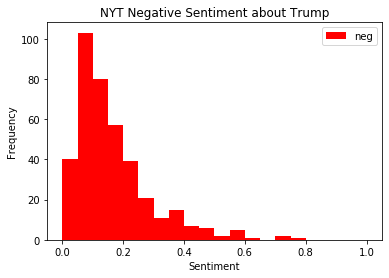

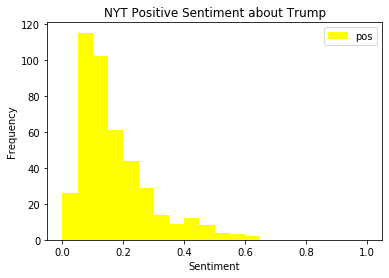

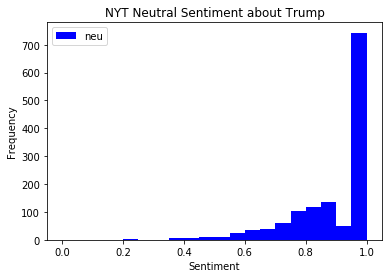

In [10]:
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=['red','yellow','blue'], title='NYT sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Negative Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"],title='NYT Positive Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Neutral Sentiment about Trump').set_xlabel("Sentiment")

## Clinton Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

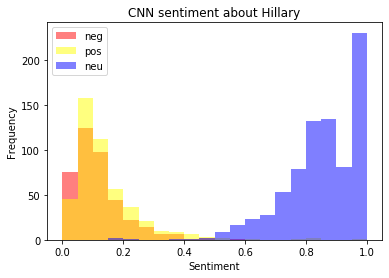

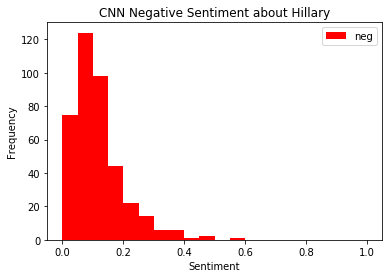

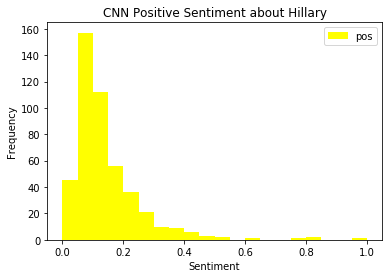

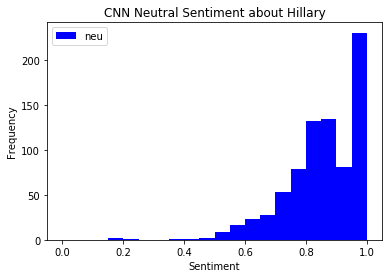

In [11]:
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=['red','yellow','blue'],title='CNN sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='CNN Negative Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"],title='CNN Positive Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='CNN Neutral Sentiment about Hillary').set_xlabel("Sentiment")

### Breitbart Articles

Text(0.5, 0, 'Sentiment')

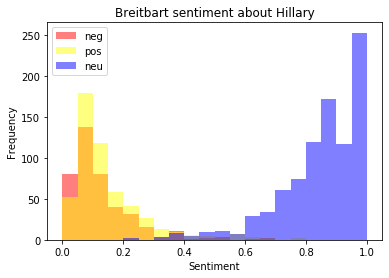

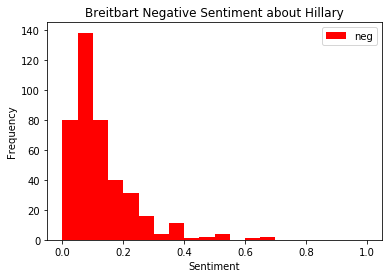

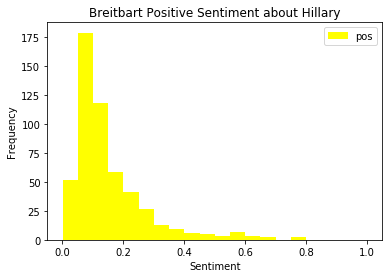

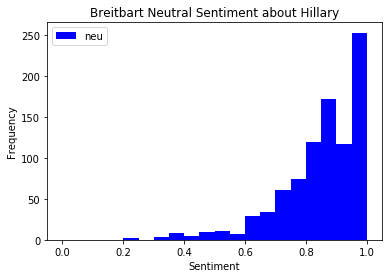

In [12]:
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=['red','yellow','blue'], title='Breitbart sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart Negative Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"],title='Breitbart Positive Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Neutral Sentiment about Hillary').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

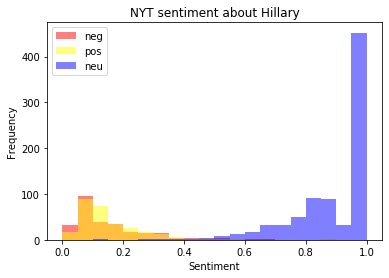

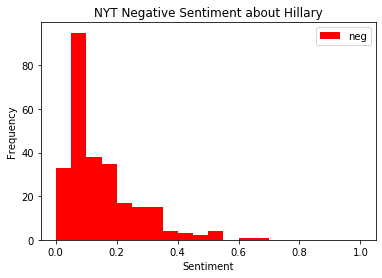

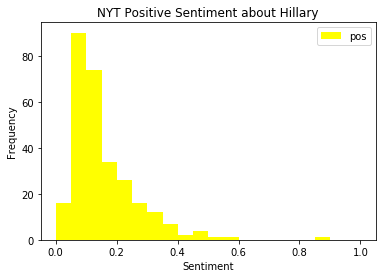

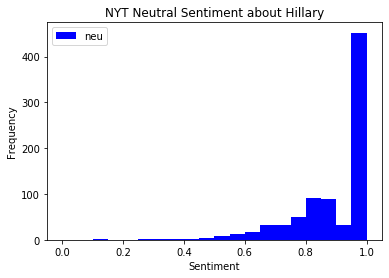

In [13]:
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5,color=['red','yellow','blue'],title='NYT sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Negative Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"],title='NYT Positive Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Neutral Sentiment about Hillary').set_xlabel("Sentiment")

# Less Neutral Article Visualization

So, given this data set, there were high amounts of 0's for neg/pos sentiment because there were a high amount of articles that were neutral
So, lets look at the data again, but this time remove all articles that were neutral. This data set will show us the sentiment for articles that were not completely neutral based on a threshold of 0.8

In [14]:
df_noNeu = df.loc[(df['neu'] < 0.8)]

# Trump Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

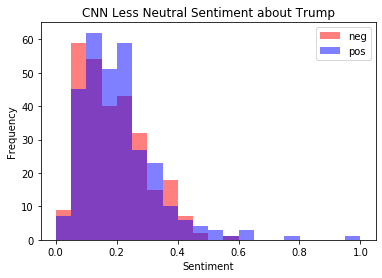

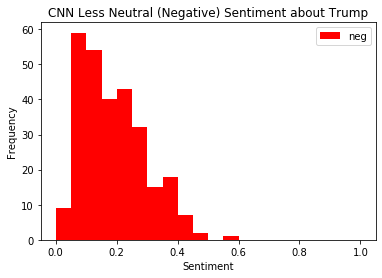

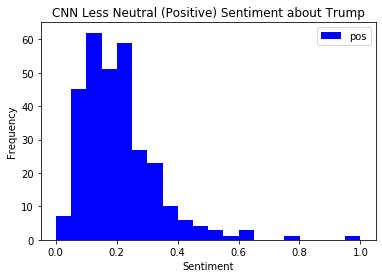

In [15]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='CNN Less Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='CNN Less Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='CNN Less Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

### Breitbart Articles

Text(0.5, 0, 'Sentiment')

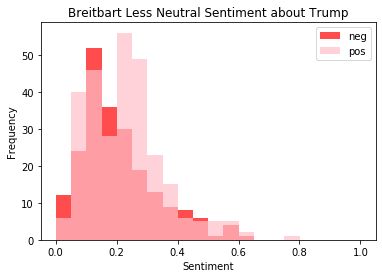

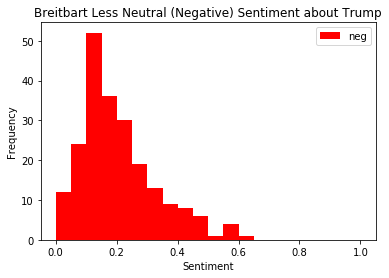

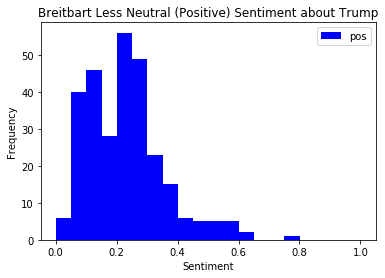

In [16]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","pink"],title='Breitbart Less Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart Less Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Less Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

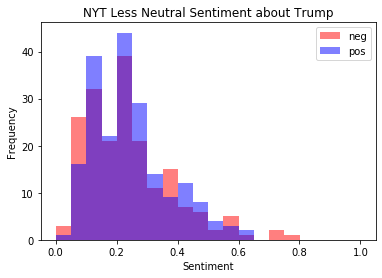

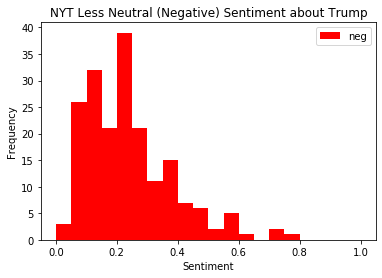

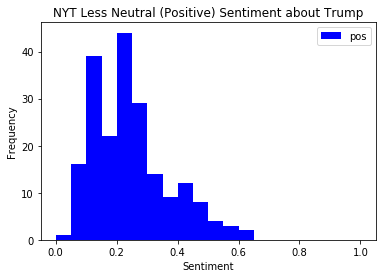

In [17]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"], title='NYT Less Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Less Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Less Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

# Clinton Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

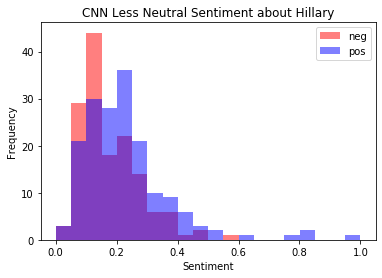

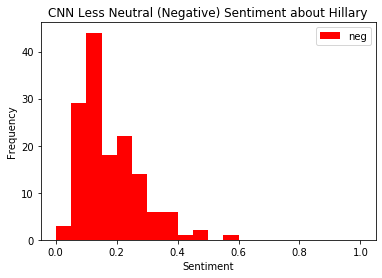

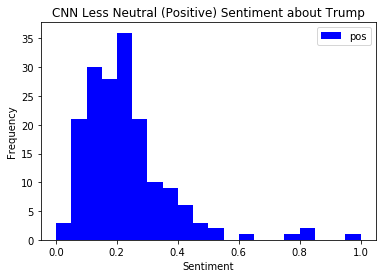

In [18]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='CNN Less Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='CNN Less Neutral (Negative) Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='CNN Less Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

### Breitbart Articles

Text(0.5, 0, 'Sentiment')

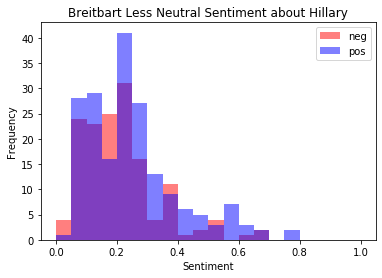

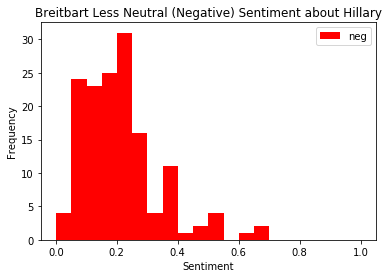

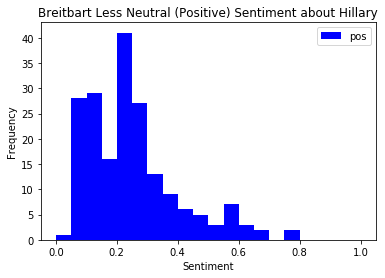

In [19]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='Breitbart Less Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart Less Neutral (Negative) Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Less Neutral (Positive) Sentiment about Hillary').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

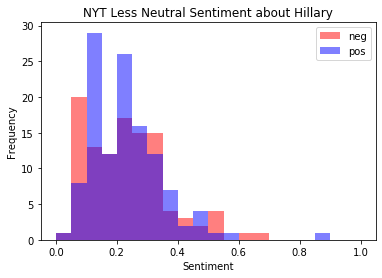

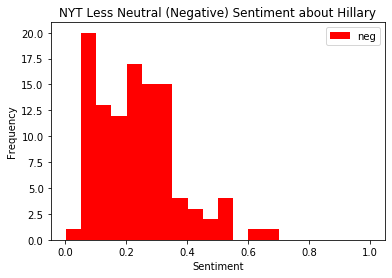

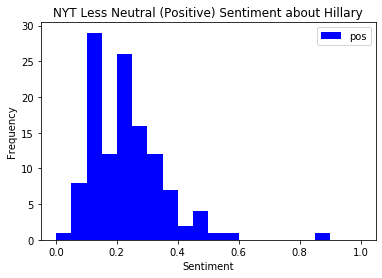

In [20]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='NYT Less Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Less Neutral (Negative) Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Less Neutral (Positive) Sentiment about Hillary').set_xlabel("Sentiment")

# Little Neutral Article Visualization

Just for fun, we will do the same thing, but with an even lower neutral threshold of 0.5, just to visualize the data for the sentimentally charged articles

In [21]:
df_noNeu = df.loc[(df['neu'] < 0.5)]

# Trump Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

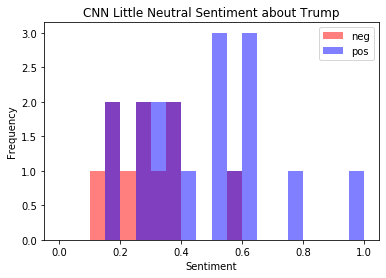

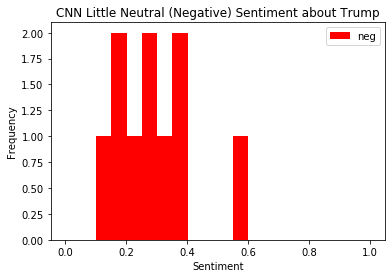

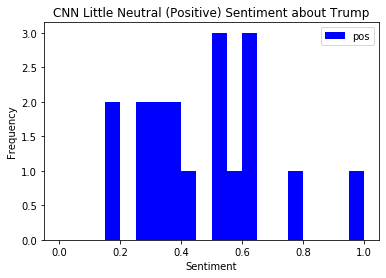

In [22]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"], title='CNN Little Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='CNN Little Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='CNN Little Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

### Breitbart Articles

Text(0.5, 0, 'Sentiment')

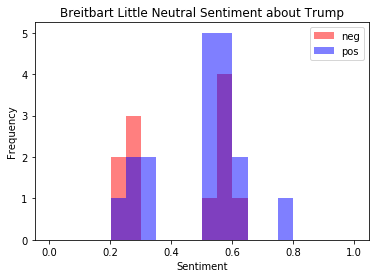

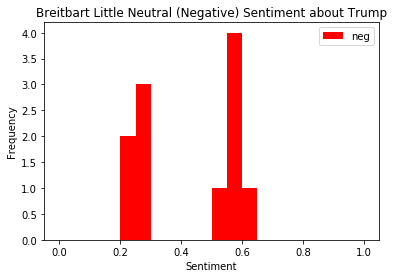

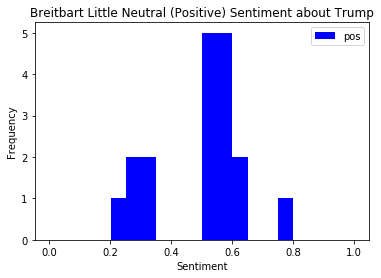

In [23]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='Breitbart Little Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart Little Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Little Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

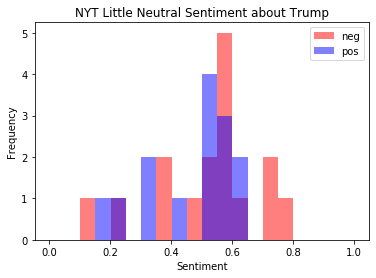

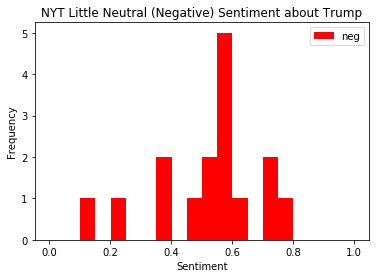

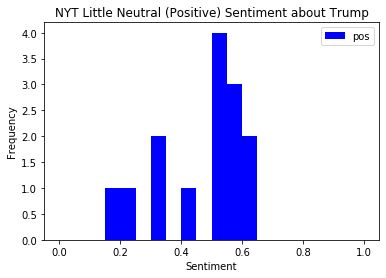

In [24]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='NYT Little Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Little Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Little Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

# Clinton Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

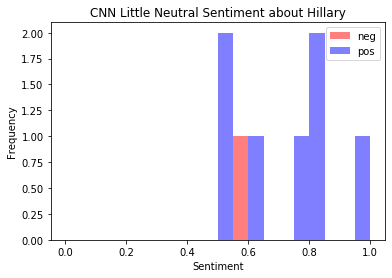

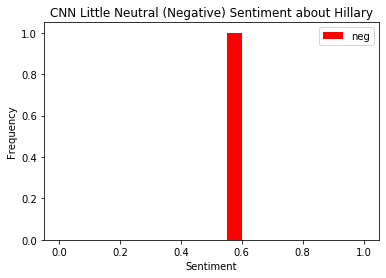

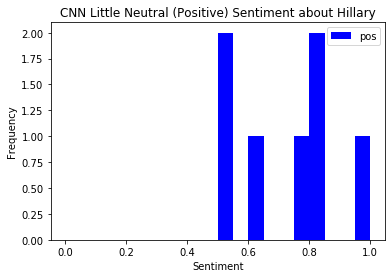

In [25]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='CNN Little Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='CNN Little Neutral (Negative) Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='CNN Little Neutral (Positive) Sentiment about Hillary').set_xlabel("Sentiment")

### Breitbart Articles

Text(0.5, 0, 'Sentiment')

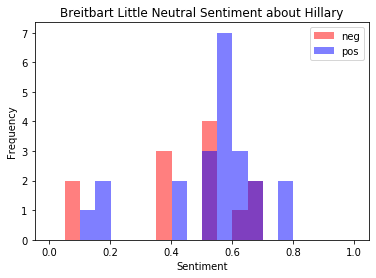

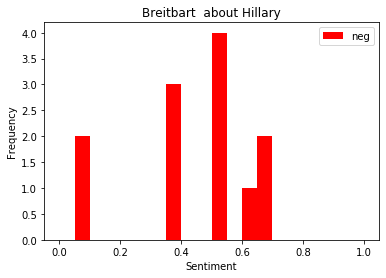

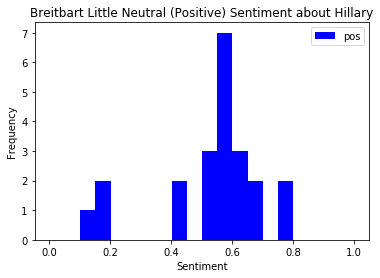

In [26]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='Breitbart Little Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart  about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Little Neutral (Positive) Sentiment about Hillary').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

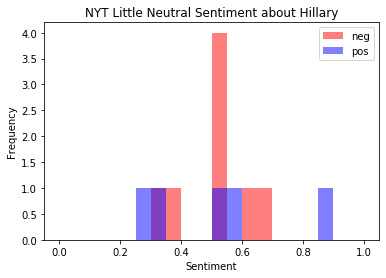

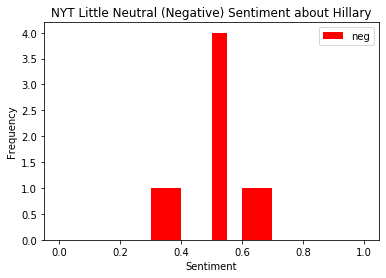

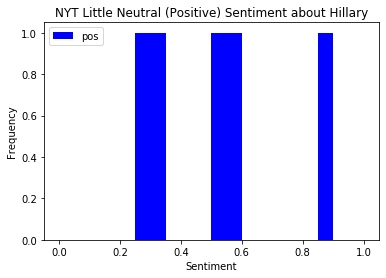

In [27]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='NYT Little Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Little Neutral (Negative) Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Little Neutral (Positive) Sentiment about Hillary').set_xlabel("Sentiment")

# Sentiment of Trump Across all Articles

In [28]:
# Sentiment of Trump Across all Articles
cnn1 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["pos"]
cnn2 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["neg"]
cnn3 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["neu"]
nyt1 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["pos"]
nyt2 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["neg"]
nyt3 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["neu"]
br1 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["pos"]
br2 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["neg"]
br3 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["neu"]

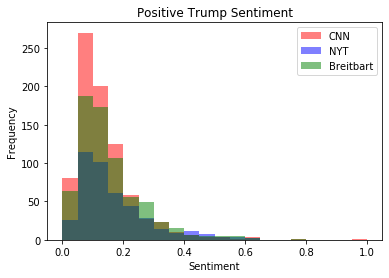

In [29]:
# Trump, pos
plt.hist(cnn1, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color ="red")
plt.hist(nyt1, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br1, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Positive Trump Sentiment')
plt.show()


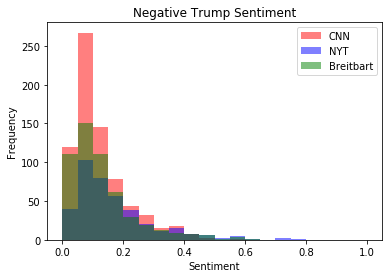

In [30]:
# Trump, neg
plt.hist(cnn2, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt2, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br2, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Negative Trump Sentiment')
plt.show()

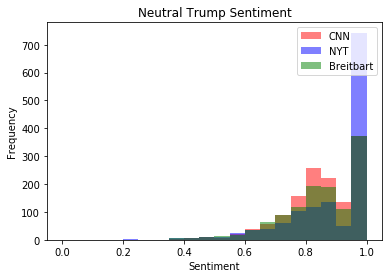

In [31]:
# Trump, neu
plt.hist(cnn3, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt3, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br3, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Neutral Trump Sentiment')
plt.show()

# Sentiment of Hillary Across All Articles

In [32]:
# Sentiment of Hillary Across all Articles
cnn4 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["pos"]
cnn5 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["neg"]
cnn6 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["neu"]
nyt4 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["pos"]
nyt5 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["neg"]
nyt6 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["neu"]
br4 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["pos"]
br5 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["neg"]
br6 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["neu"]

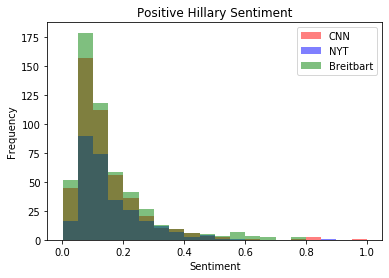

In [33]:
# Hillary, pos
plt.hist(cnn4, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt4, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br4, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Positive Hillary Sentiment')
plt.show()

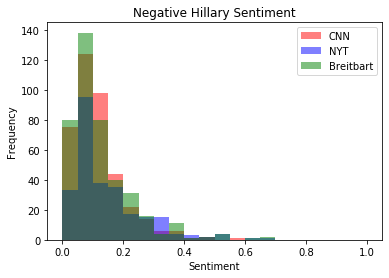

In [34]:
# Hillary, neg
plt.hist(cnn5, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt5, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br5, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Negative Hillary Sentiment')
plt.show()

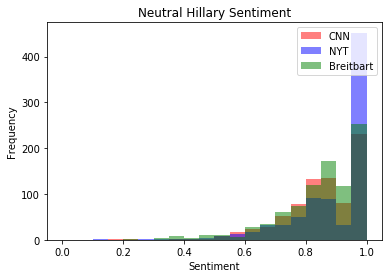

In [35]:
# Hillary, neu
plt.hist(cnn6, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt6, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br6, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Neutral Hillary Sentiment')
plt.show()

# Less Neutral Sentiment of Trump Across All Articles

In [36]:
# Less Neutral Sentiment of Trump Across all Articles
cnn7 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["pos"]
cnn8 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["neg"]
nyt7 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["pos"]
nyt8 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["neg"]
br7 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["pos"]
br8 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["neg"]

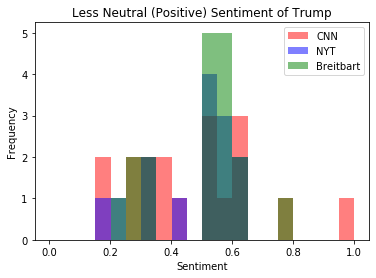

In [37]:
# Trump, pos
plt.hist(cnn7, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt7, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br7, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Less Neutral (Positive) Sentiment of Trump')
plt.show()

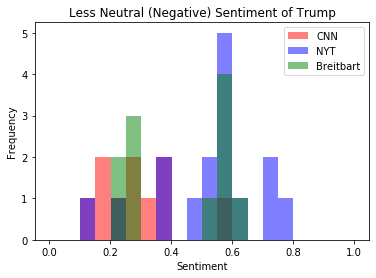

In [38]:
# Trump, neg
plt.hist(cnn8, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt8, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br8, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Less Neutral (Negative) Sentiment of Trump')
plt.show()

# Less Neutral Sentiment of Hillary Across All Articles

In [39]:
# Less Neutral Sentiment of Hillary Across all Articles
cnn9 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["pos"]
cnn10 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["neg"]
nyt9 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["pos"]
nyt10 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["neg"]
br9 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["pos"]
br10 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["neg"]

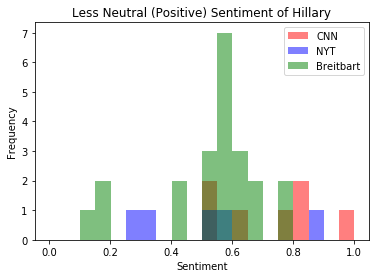

In [40]:
# Hillary, pos
plt.hist(cnn9, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt9, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br9, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Less Neutral (Positive) Sentiment of Hillary')
plt.show()

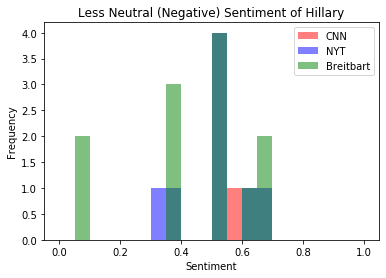

In [41]:
# Hillary, neg
plt.hist(cnn10, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt10, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br10, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Less Neutral (Negative) Sentiment of Hillary')
plt.show()

# Little Neutral Sentiment of Trump Across all Articles

In [42]:
# Little Neutral Sentiment of Trump Across all Articles
cnn11 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["pos"]
cnn12 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["neg"]
nyt11 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["pos"]
nyt12 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["neg"]
br11 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["pos"]
br12 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["neg"]

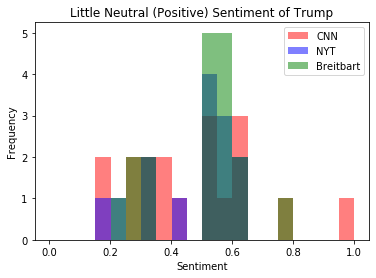

In [43]:
# Trump, pos
plt.hist(cnn11, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt11, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br11, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Little Neutral (Positive) Sentiment of Trump')
plt.show()

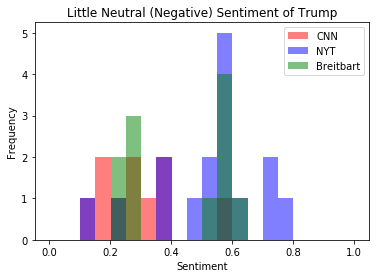

In [44]:
# Trump, neg
plt.hist(cnn12, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt12, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br12, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Little Neutral (Negative) Sentiment of Trump')
plt.show()

# Little Neutral Sentiment of Hillary Across All Articles

In [45]:
# Little Neutral Sentiment of Hillary Across all Articles
cnn13 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["pos"]
cnn14 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["neg"]
nyt13 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["pos"]
nyt14 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["neg"]
br13 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["pos"]
br14 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["neg"]

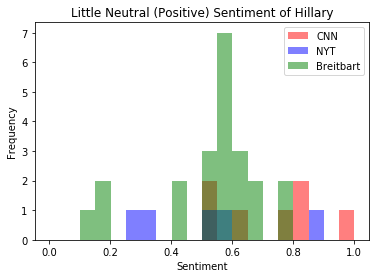

In [46]:
# Hillary, pos
plt.hist(cnn13, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN',color='red')
plt.hist(nyt13, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT',color='blue')
plt.hist(br13, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart',color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Little Neutral (Positive) Sentiment of Hillary')
plt.show()

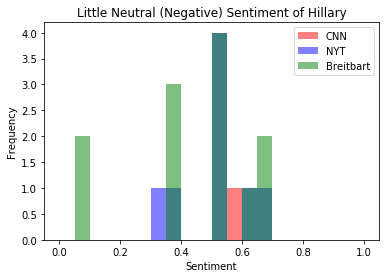

In [47]:
# Hillary, neg
plt.hist(cnn14, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN',color='red')
plt.hist(nyt14, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT',color='blue')
plt.hist(br14, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Little Neutral (Negative) Sentiment of Hillary')
plt.show()

# Average Sentiment of Trump

In [48]:
#df of CNN articles on Trump
cnnTrumpIncludingNeu = df.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
cnnTrumpIncludingNeuAvgOfNeu = cnnTrumpIncludingNeu['neu'].mean()
cnnTrumpIncludingNeuAvgOfNeg = cnnTrumpIncludingNeu['neg'].mean()
cnnTrumpIncludingNeuAvgOfPos = cnnTrumpIncludingNeu['pos'].mean()

In [49]:
#df of Breitbart articles on Trump
BreitbartTrumpIncludingNeu = df.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == "Trump")]

#get the average neutral sentiment on Trump
BreitbartTrumpIncludingNeuAvgOfNeu = BreitbartTrumpIncludingNeu['neu'].mean()
BreitbartTrumpIncludingNeuAvgOfNeg = BreitbartTrumpIncludingNeu['neg'].mean()
BreitbartTrumpIncludingNeuAvgOfPos = BreitbartTrumpIncludingNeu['pos'].mean()

In [50]:
#df of NYT articles on Trump
NYTTrumpIncludingNeu = df.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Trump")]

#get the average neutral sentiment on Trump
NYTTrumpIncludingNeuAvgOfNeu = NYTTrumpIncludingNeu['neu'].mean()
NYTTrumpIncludingNeuAvgOfNeg = NYTTrumpIncludingNeu['neg'].mean()
NYTTrumpIncludingNeuAvgOfPos = NYTTrumpIncludingNeu['pos'].mean()

In [51]:
#data frame averages when including neutral
d = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidate': ['Trump', 'Trump', 'Trump'], 
     'neg' : [cnnTrumpIncludingNeuAvgOfNeg,BreitbartTrumpIncludingNeuAvgOfNeg, NYTTrumpIncludingNeuAvgOfNeg],
     'neu' : [cnnTrumpIncludingNeuAvgOfNeu,BreitbartTrumpIncludingNeuAvgOfNeu, NYTTrumpIncludingNeuAvgOfNeu],
     'pos' : [cnnTrumpIncludingNeuAvgOfPos,BreitbartTrumpIncludingNeuAvgOfPos, NYTTrumpIncludingNeuAvgOfPos]}
AverageSetimentsIncludingNeu = pd.DataFrame(data=d)
AverageSetimentsIncludingNeu

,News_Source,Candidate,neg,neu,pos
0,CNN,Trump,0.065015,0.854287,0.080702
1,Breitbart,Trump,0.055926,0.855388,0.088687
2,NYT,Trump,0.048763,0.896634,0.054600


# Average Sentiment of Hillary

In [52]:
#df of CNN articles on Hillary
cnnHillaryIncludingNeu = df.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Hillary
cnnHillaryIncludingNeuAvgOfNeu = cnnHillaryIncludingNeu['neu'].mean()
cnnHillaryIncludingNeuAvgOfNeg = cnnHillaryIncludingNeu['neg'].mean()
cnnHillaryIncludingNeuAvgOfPos = cnnHillaryIncludingNeu['pos'].mean()

In [53]:
#df of Breitbart on Hillary
BreitbartHillaryIncludingNeu = df.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Hillary
BreitbartHillaryIncludingNeuAvgOfNeu = BreitbartHillaryIncludingNeu['neu'].mean()
BreitbartHillaryIncludingNeuAvgOfNeg = BreitbartHillaryIncludingNeu['neg'].mean()
BreitbartHillaryIncludingNeuAvgOfPos = BreitbartHillaryIncludingNeu['pos'].mean()

In [54]:
#df of NYT on Hillary
NYTHillaryIncludingNeu = df.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Hillary
NYTHillaryIncludingNeuAvgOfNeu = NYTHillaryIncludingNeu['neu'].mean()
NYTHillaryIncludingNeuAvgOfNeg = NYTHillaryIncludingNeu['neg'].mean()
NYTHillaryIncludingNeuAvgOfPos = NYTHillaryIncludingNeu['pos'].mean()

In [55]:
#data frame averages when including neutral
d = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidate': ['Hillary', 'Hillary', 'Hillary'], 
     'neg' : [cnnHillaryIncludingNeuAvgOfNeg,BreitbartHillaryIncludingNeuAvgOfNeg, NYTHillaryIncludingNeuAvgOfNeg],
     'neu' : [cnnHillaryIncludingNeuAvgOfNeu,BreitbartHillaryIncludingNeuAvgOfNeu, NYTHillaryIncludingNeuAvgOfNeu],
     'pos' : [cnnHillaryIncludingNeuAvgOfPos,BreitbartHillaryIncludingNeuAvgOfPos, NYTHillaryIncludingNeuAvgOfPos]}
AverageSetimentsIncludingNeu = pd.DataFrame(data=d)
AverageSetimentsIncludingNeu

,News_Source,Candidate,neg,neu,pos
0,CNN,Hillary,0.058856,0.857111,0.084024
1,Breitbart,Hillary,0.057542,0.855050,0.087426
2,NYT,Hillary,0.046653,0.899954,0.053398


# Average Sentiment of Trump (Less Neutral Article Visualization)

In [56]:
df_noNeu = df.loc[(df['neu'] < 0.8)]

In [57]:
#df of CNN on Trump
cnnTrumpNonNeu = df_noNeu.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
cnnTrumpLessNeuAvgOfNeu = cnnTrumpNonNeu['neu'].mean()
cnnTrumpLessNeuAvgOfNeg = cnnTrumpNonNeu['neg'].mean()
cnnTrumpLessNeuAvgOfPos = cnnTrumpNonNeu['pos'].mean()

In [58]:
#df of Breitbart on Trump
BreitbartTrumpNonNeu = df_noNeu.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
BreitbartTrumpLessNeuAvgOfNeu = BreitbartTrumpNonNeu['neu'].mean()
BreitbartTrumpLessNeuAvgOfNeg = BreitbartTrumpNonNeu['neg'].mean()
BreitbartTrumpLessNeuAvgOfPos = BreitbartTrumpNonNeu['pos'].mean()

In [59]:
#df of NYT on Trump
NYTTrumpNonNeu = df_noNeu.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
NYTTrumpLessNeuAvgOfNeu = NYTTrumpNonNeu['neu'].mean()
NYTTrumpLessNeuAvgOfNeg = NYTTrumpNonNeu['neg'].mean()
NYTTrumpLessNeuAvgOfPos = NYTTrumpNonNeu['pos'].mean()

In [60]:
#data frame averages when including neutral
dn = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidate': ['Trump', 'Trump', 'Trump'], 
     'neg' : [cnnTrumpLessNeuAvgOfNeg,BreitbartTrumpLessNeuAvgOfNeg, NYTTrumpLessNeuAvgOfNeg],
     'neu' : [cnnTrumpLessNeuAvgOfNeu,BreitbartTrumpLessNeuAvgOfNeu, NYTTrumpLessNeuAvgOfNeu],
     'pos' : [cnnTrumpLessNeuAvgOfPos,BreitbartTrumpLessNeuAvgOfPos, NYTTrumpLessNeuAvgOfPos]}
AverageSetimentsNonNeu = pd.DataFrame(data=dn)
AverageSetimentsNonNeu

,News_Source,Candidate,neg,neu,pos
0,CNN,Trump,0.137865,0.700586,0.161542
1,Breitbart,Trump,0.124175,0.689417,0.186406
2,NYT,Trump,0.156189,0.674486,0.169314


# Average Sentiment of Hillary (Less Neutral Article Visualization)

In [61]:
#df of CNN on Hillary
cnnHillaryNonNeu = df_noNeu.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Hillary
cnnHillaryLessNeuAvgOfNeu = cnnHillaryNonNeu['neu'].mean()
cnnHillaryLessNeuAvgOfNeg = cnnHillaryNonNeu['neg'].mean()
cnnHillaryLessNeuAvgOfPos = cnnHillaryNonNeu['pos'].mean()

In [62]:
#df of Breitbart on Hillary
BreitbartHillaryNonNeu = df_noNeu.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Hillary
BreitbartHillaryLessNeuAvgOfNeu = BreitbartHillaryNonNeu['neu'].mean()
BreitbartHillaryLessNeuAvgOfNeg = BreitbartHillaryNonNeu['neg'].mean()
BreitbartHillaryLessNeuAvgOfPos = BreitbartHillaryNonNeu['pos'].mean()

In [63]:
#df of NYT on Hillary
NYTHillaryNonNeu = df_noNeu.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Trump
NYTHillaryLessNeuAvgOfNeu = NYTHillaryNonNeu['neu'].mean()
NYTHillaryLessNeuAvgOfNeg = NYTHillaryNonNeu['neg'].mean()
NYTHillaryLessNeuAvgOfPos = NYTHillaryNonNeu['pos'].mean()

In [64]:
#data frame averages when including neutral
dn = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidate': ['Hillary', 'Hillary', 'Hillary'], 
     'neg' : [cnnHillaryLessNeuAvgOfNeg,BreitbartHillaryLessNeuAvgOfNeg, NYTHillaryLessNeuAvgOfNeg],
     'neu' : [cnnHillaryLessNeuAvgOfNeu,BreitbartHillaryLessNeuAvgOfNeu, NYTHillaryLessNeuAvgOfNeu],
     'pos' : [cnnHillaryLessNeuAvgOfPos,BreitbartHillaryLessNeuAvgOfPos, NYTHillaryLessNeuAvgOfPos]}
AverageSetimentsNonNeu = pd.DataFrame(data=dn)
AverageSetimentsNonNeu

,News_Source,Candidate,neg,neu,pos
0,CNN,Hillary,0.120934,0.690789,0.188244
1,Breitbart,Hillary,0.128235,0.674103,0.197671
2,NYT,Hillary,0.152685,0.678467,0.168812


# Average Sentiment of Trump (Little Neutral Article Visualization)

In [65]:
df_noNeu = df.loc[(df['neu'] < 0.5)]

In [66]:
#df of CNN on Trump
cnnTrumplitNeu = df_noNeu.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
cnnTrumplitNeuAvgOfNeu = cnnTrumplitNeu['neu'].mean()
cnnTrumplitNeuAvgOfNeg = cnnTrumplitNeu['neg'].mean()
cnnTrumplitNeuAvgOfPos = cnnTrumplitNeu['pos'].mean()

In [67]:
#df of Breitbart on Trump
BreitbartTrumplitNeu = df_noNeu.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
BreitbartTrumplitNeuAvgOfNeu = BreitbartTrumplitNeu['neu'].mean()
BreitbartTrumplitNeuAvgOfNeg = BreitbartTrumplitNeu['neg'].mean()
BreitbartTrumplitNeuAvgOfPos = BreitbartTrumplitNeu['pos'].mean()

In [68]:
#df of NYT on Trump
NYTTrumplitNeu = df_noNeu.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
NYTTrumplitNeuAvgOfNeu = NYTTrumplitNeu['neu'].mean()
NYTTrumplitNeuAvgOfNeg = NYTTrumplitNeu['neg'].mean()
NYTTrumplitNeuAvgOfPos = NYTTrumplitNeu['pos'].mean()

In [69]:
#data frame averages when including neutral
dn = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidiate': ['Trump', 'Trump', 'Trump'], 
     'neg' : [cnnTrumplitNeuAvgOfNeg,BreitbartTrumpLessNeuAvgOfNeg, NYTTrumpLessNeuAvgOfNeg],
     'neu' : [cnnTrumplitNeuAvgOfNeu,BreitbartTrumpLessNeuAvgOfNeu, NYTTrumpLessNeuAvgOfNeu],
     'pos' : [cnnTrumplitNeuAvgOfPos,BreitbartTrumpLessNeuAvgOfPos, NYTTrumpLessNeuAvgOfPos]}
AverageSetimentsNonNeu = pd.DataFrame(data=dn)
AverageSetimentsNonNeu

,News_Source,Candidiate,neg,neu,pos
0,CNN,Trump,0.149526,0.402263,0.448158
1,Breitbart,Trump,0.124175,0.689417,0.186406
2,NYT,Trump,0.156189,0.674486,0.169314


# Average Sentiment of Hillary (Little Neutral Article Visualization)

In [70]:
#df of CNN on Hillary
cnnHillarylitNeu = df_noNeu.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Trump
cnnHillarylitNeuAvgOfNeu = cnnHillarylitNeu['neu'].mean()
cnnHillarylitNeuAvgOfNeg = cnnHillarylitNeu['neg'].mean()
cnnHillarylitNeuAvgOfPos = cnnHillarylitNeu['pos'].mean()

In [71]:
#df of Breitbart on Hillary
BreitbartHillarylitNeu = df_noNeu.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Trump
BreitbartHillarylitNeuAvgOfNeu = BreitbartHillarylitNeu['neu'].mean()
BreitbartHillarylitNeuAvgOfNeg = BreitbartHillarylitNeu['neg'].mean()
BreitbartHillarylitNeuAvgOfPos = BreitbartHillarylitNeu['pos'].mean()

In [72]:
#df of NYT on Hillary
NYTHillarylitNeu = df_noNeu.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Trump
NYTHillarylitNeuAvgOfNeu = NYTHillarylitNeu['neu'].mean()
NYTHillarylitNeuAvgOfNeg = NYTHillarylitNeu['neg'].mean()
NYTHillarylitNeuAvgOfPos = NYTHillarylitNeu['pos'].mean()

In [73]:
#data frame averages when including neutral
dn = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidate': ['Hillary', 'Hillary', 'Hillary'], 
     'neg' : [cnnHillarylitNeuAvgOfNeg,BreitbartHillaryLessNeuAvgOfNeg, NYTHillaryLessNeuAvgOfNeg],
     'neu' : [cnnHillarylitNeuAvgOfNeu,BreitbartHillaryLessNeuAvgOfNeu, NYTHillaryLessNeuAvgOfNeu],
     'pos' : [cnnHillarylitNeuAvgOfPos,BreitbartHillaryLessNeuAvgOfPos, NYTHillaryLessNeuAvgOfPos]}
AverageSetimentsNonNeu = pd.DataFrame(data=dn)
AverageSetimentsNonNeu

,News_Source,Candidate,neg,neu,pos
0,CNN,Hillary,0.071750,0.295750,0.632500
1,Breitbart,Hillary,0.128235,0.674103,0.197671
2,NYT,Hillary,0.152685,0.678467,0.168812


# Normal Distribution

In [74]:
def reject_null(p_value):
    if p_value < 0.01:
        return True
    else:
        return False

In [75]:
# get all the values by sentiment by candidate
hillary_pos = df[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]['pos'].values
hillary_neg = df[df['Candidate'] == 'Hillary']['neg'].values
hillary_neu = df[df['Candidate'] == 'Hillary']['neu'].values
trump_pos = df[df['Candidate'] == 'Trump']['pos'].values
trump_neg = df[df['Candidate'] == 'Trump']['neg'].values
trump_neu = df[df['Candidate'] == 'Trump']['neu'].values

In [76]:
# get the test stat and p-value
stat_hillary_pos, p_hillary_pos = normaltest(hillary_pos)
stat_hillary_neg, p_hillary_neg = normaltest(hillary_neg)
stat_hillary_neu, p_hillary_neu = normaltest(hillary_neu)

stat_trump_pos, p_trump_pos = normaltest(trump_pos)
stat_trump_neg, p_trump_neg = normaltest(trump_neg)
stat_trump_neu, p_trump_neu = normaltest(trump_neu)

In [77]:
# see if the p-values reject the null
bool_hillary_pos = reject_null(p_hillary_pos)
bool_hillary_neg = reject_null(p_hillary_neg)
bool_hillary_neu = reject_null(p_hillary_neu)

bool_trump_pos = reject_null(p_trump_pos)
bool_trump_neg = reject_null(p_trump_neg)
bool_trump_neu = reject_null(p_trump_neu)

print(bool_hillary_pos)
print(bool_hillary_neg)
print(bool_hillary_neu)
print(bool_trump_pos)
print(bool_trump_neg)
print(bool_trump_neu)

True
True
True
True
True
True


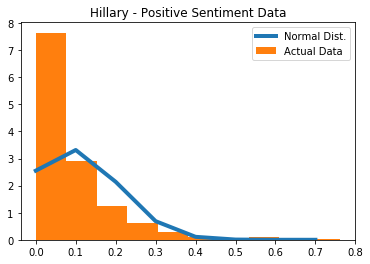

In [78]:
xs = np.arange(hillary_pos.min(), hillary_pos.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(hillary_pos), np.std(hillary_pos))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(hillary_pos, density = True, label = 'Actual Data');
plt.title('Hillary - Positive Sentiment Data')
plt.legend();

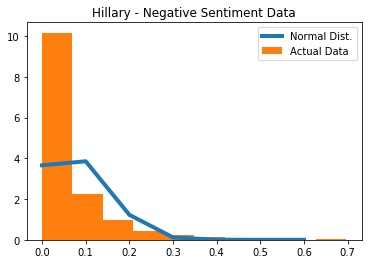

In [79]:
xs = np.arange(hillary_neg.min(), hillary_neg.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(hillary_neg), np.std(hillary_neg))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(hillary_neg, density = True, label = 'Actual Data');
plt.title('Hillary - Negative Sentiment Data')
plt.legend();

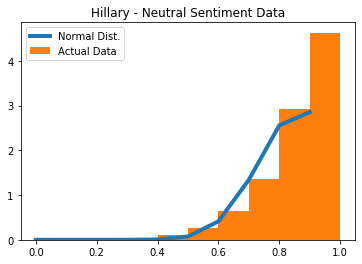

In [80]:
xs = np.arange(hillary_neu.min(), hillary_neu.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(hillary_neu), np.std(hillary_neu))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(hillary_neu, density = True, label = 'Actual Data');
plt.title('Hillary - Neutral Sentiment Data')
plt.legend();

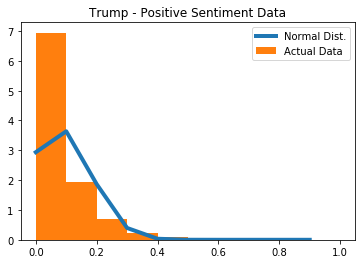

In [81]:
xs = np.arange(trump_pos.min(), trump_pos.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(trump_pos), np.std(trump_pos))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(trump_pos, density = True, label = 'Actual Data');
plt.title('Trump - Positive Sentiment Data')
plt.legend();

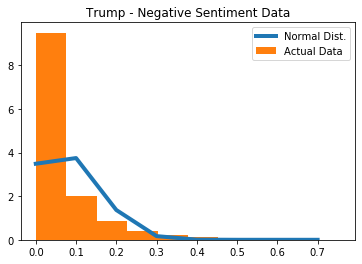

In [82]:
xs = np.arange(trump_neg.min(), trump_neg.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(trump_neg), np.std(trump_neg))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(trump_neg, density = True, label = 'Actual Data');
plt.title('Trump - Negative Sentiment Data')
plt.legend();

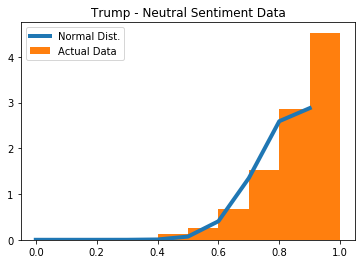

In [83]:
xs = np.arange(trump_neu.min(), trump_neu.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(trump_neu), np.std(trump_neu))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(trump_neu, density = True, label = 'Actual Data');
plt.title('Trump - Neutral Sentiment Data')
plt.legend();

# T-Test

In [84]:
# get test stat and p-value
t_pos, p_pos = ttest_ind(hillary_pos, trump_pos)
t_neg, p_neg = ttest_ind(hillary_neg, trump_neg)
t_neu, p_neu = ttest_ind(hillary_neu, trump_neu)

In [85]:
# check if p-values are significant
bool_pos = reject_null(p_pos)
bool_neg = reject_null(p_neg)
bool_neu = reject_null(p_neu)

print(bool_pos)
print(bool_neg)
print(bool_neu)

True
False
False
